In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import glob

In [ ]:
output_folder = 'output/'

In [ ]:
data_names = os.listdir(output_folder)
print(data_names)

In [ ]:
# keep only one image from all_rgb_files based on the data_names
all_rgb_files = []
for data_name in data_names:
    for rgb_file in glob.glob(output_folder + '/*/*/*/RGB.png'):
        if data_name in rgb_file:
            all_rgb_files.append(rgb_file)
            break


In [ ]:
all_rgb_files = sorted(all_rgb_files)
all_rgb_files

In [ ]:
all_rgb_files =glob.glob(output_folder + '/*/GBRX/*/RGB.png')
all_rgb_files = sorted(all_rgb_files)
all_rgb_files[0]

In [ ]:
all_demosaiced_files = glob.glob(output_folder + '/*/GBRX/*/Demosaiced_*.png')

In [ ]:
all_demosaiced_files = sorted(all_demosaiced_files)

In [ ]:
assert len(all_rgb_files) == len(all_demosaiced_files)

In [ ]:
images_to_plot = {}
for rgb_file in all_rgb_files:
    images_to_plot[rgb_file] = []
    for demosaiced_file in all_demosaiced_files:
        tracker_parts = os.path.join(rgb_file.split('\\')[1], rgb_file.split('\\')[2])
        print(tracker_parts)
        if tracker_parts in demosaiced_file:
            images_to_plot[rgb_file].append(demosaiced_file)

In [ ]:
print(len(images_to_plot))

In [ ]:
# print the first element of the dictionary
print(list(images_to_plot.keys())[0])
print(images_to_plot[list(images_to_plot.keys())[0]])


In [ ]:
# images_to_plot_v2 = images_to_plot.copy()
# # take i-th key and skip i+1, i+2 and take i+3
# images_to_plot = {}
# target_data = [data_names[2]]
# # keep only one image from all_rgb_files based on the target_data
# for i, key in enumerate(images_to_plot_v2.keys()):
#     if target_data[0] in key:
#         images_to_plot[key] = images_to_plot_v2[key]
        
# print(len(images_to_plot))
# print(len(images_to_plot_v2))

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Create a figure with a single plot
fig, ax = plt.subplots(figsize=(10, 6))

colors = ["green", "red", "blue", "black"]  # Add colors for all histograms
for i, (rgb_path, demosaiced_paths) in enumerate(images_to_plot.items()):
    if i == 1:
        
        # Load the RGB image and extract its green channel
        rgb_image = Image.open(rgb_path)
        rgb_array = np.array(rgb_image)
        green_rgb = rgb_array[..., 1]  # Extract the green channel

        # Plot the histogram for the RGB green channel
        ax.hist(
            green_rgb.flatten(),
            bins=256,
            color=colors[0],
            alpha=0.5,  # Adjust transparency for overlap
            label="RGB Green",
            linewidth=2,
            histtype="step",
        )

        # Loop through the demosaiced images and plot their green channel histograms
        for j, demosaiced_path in enumerate(demosaiced_paths):
            demosaiced_image = Image.open(demosaiced_path)
            demosaiced_array = np.array(demosaiced_image)
            green_demosaiced = demosaiced_array[..., 1]  # Extract the green channel

            # Extract the demosaicing algorithm name for the label
            demosaicing_algorithm = demosaiced_path.split('\\')[-2]
            ax.hist(
                green_demosaiced.flatten(),
                bins=256,
                color=colors[j + 1],
                alpha=0.5,  # Adjust transparency for overlap
                label=f"{demosaicing_algorithm} Green",
                linewidth=2,
                histtype="step",
            )
    else:
        continue
    

# Customize plot
ax.set_xlim([0, 255])
ax.set_xlabel("Pixel Intensity", fontsize=12)
ax.set_ylabel("Frequency", fontsize=12)
ax.set_title("Green Channel Histogram Comparison REFLECTANCE_HS-DATASET_2023-03-22_009", fontsize=14)
ax.legend(loc="upper right", fontsize=10)

# Show the plot
plt.tight_layout()
plt.savefig('output_REFLECTANCE_HS-DATASET_2023-03-22_009_histogram.png')
plt.show()


In [ ]:
import matplotlib.gridspec as gridspec
from PIL import Image

# Create a figure with a GridSpec layout
fig = plt.figure(figsize=(12, len(images_to_plot) * 3))
gs = gridspec.GridSpec(len(images_to_plot), 5, width_ratios=[1, 4, 4, 4, 4], wspace=0.0)

for i, (rgb_path, demosaiced_paths) in enumerate(images_to_plot.items()):
    # Add the pattern label on the left
    pattern = rgb_path.split('\\')[-3]
    ax_label = fig.add_subplot(gs[i, 0])
    ax_label.text(0.5, 0.5, pattern, fontsize=12, ha='center', va='center', rotation=0)
    ax_label.axis("off")  # Turn off axis lines for labels

    # Add the RGB image
    ax_rgb = fig.add_subplot(gs[i, 1])
    rgb_image = Image.open(rgb_path)
    # print(rgb_image.size)
    ax_rgb.imshow(rgb_image)
    ax_rgb.axis("off")
    if i == 0:
        ax_rgb.set_title("RGB")

    # Add the demosaiced images
    for j, demosaiced_path in enumerate(demosaiced_paths):
        ax_demo = fig.add_subplot(gs[i, j + 2])
        demosaiced_image = Image.open(demosaiced_path)
        ax_demo.imshow(demosaiced_image)
        ax_demo.axis("off")
        if i == 0:
            demosaicing_algorithm = demosaiced_path.split('\\')[-2]
            ax_demo.set_title(demosaicing_algorithm)

# Adjust layout
# plt.tight_layout()
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)  # Fine-tune margins for better layout
plt.savefig('output_samples.png')
plt.show()


In [4]:
import pandas as pd
import glob

In [5]:
output_folder = "output" 

In [10]:
all_csv_files_old_gbrx_bil

['output\\old_man_crop1\\GBRX\\bilinear\\quality_metrics.csv',
 'output\\old_man_crop2\\GBRX\\bilinear\\quality_metrics.csv',
 'output\\old_man_crop3\\GBRX\\bilinear\\quality_metrics.csv',
 'output\\old_man_crop4\\GBRX\\bilinear\\quality_metrics.csv']

In [15]:
# read the first csv files and concatenate them
def read_csv_files(patterns):
    all_csv_files_old_gbrx_bil = glob.glob(output_folder + patterns) #'/old_*/GBRX/bilinear/*.csv')
    print(all_csv_files_old_gbrx_bil)
    for i, csv_file in enumerate(all_csv_files_old_gbrx_bil):
        if i == 0:
            df = pd.read_csv(csv_file)
        else:
            df = pd.concat([df, pd.read_csv(csv_file)], axis=0)
    return df

In [16]:
df1 = read_csv_files('/old_*/GBRX/bilinear/*.csv')
df1.describe()

['output\\old_man_crop1\\GBRX\\bilinear\\quality_metrics.csv', 'output\\old_man_crop2\\GBRX\\bilinear\\quality_metrics.csv', 'output\\old_man_crop3\\GBRX\\bilinear\\quality_metrics.csv', 'output\\old_man_crop4\\GBRX\\bilinear\\quality_metrics.csv']


,ssim,psnr,mse,fsim,vif,ms_ssim,vsi,gmsd,lpips,pieapp,dists
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,0.013460,12.938187,0.083848,0.527597,0.000366,0.281498,0.865834,0.264987,0.653133,3.111809,0.751962
std,0.007927,5.349957,0.091321,0.102567,0.000138,0.115068,0.050739,0.015268,0.048668,0.420230,0.018122
min,0.003263,6.627448,0.010685,0.378299,0.000192,0.136185,0.790724,0.244498,0.584796,2.682599,0.732359
25%,0.009371,11.073968,0.041520,0.502146,0.000306,0.240070,0.859764,0.258691,0.642292,2.814430,0.740452
50%,0.014683,12.706519,0.053655,0.565130,0.000375,0.286565,0.885260,0.267661,0.663890,3.078030,0.750794
75%,0.018772,14.570738,0.095983,0.590581,0.000435,0.327994,0.891330,0.273958,0.674731,3.375408,0.762304
max,0.021212,19.712265,0.217398,0.601831,0.000522,0.416676,0.902092,0.280129,0.699957,3.608577,0.773902


In [17]:
df2 = read_csv_files('/old_*/GBRX/malv*/*.csv')
df2.describe()

['output\\old_man_crop1\\GBRX\\malvar2004\\quality_metrics.csv', 'output\\old_man_crop2\\GBRX\\malvar2004\\quality_metrics.csv', 'output\\old_man_crop3\\GBRX\\malvar2004\\quality_metrics.csv', 'output\\old_man_crop4\\GBRX\\malvar2004\\quality_metrics.csv']


,ssim,psnr,mse,fsim,vif,ms_ssim,vsi,gmsd,lpips,pieapp,dists
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,0.006000,10.796998,0.130278,0.459747,0.000328,0.231692,0.830145,0.279077,0.686824,3.797952,0.745429
std,0.004529,5.477806,0.116532,0.100747,0.000126,0.121982,0.056876,0.019249,0.040417,0.688715,0.023340
min,0.002110,5.369360,0.014608,0.322328,0.000187,0.109557,0.749021,0.252802,0.626452,2.813307,0.712630
25%,0.003942,8.064919,0.070479,0.431747,0.000274,0.163405,0.818895,0.270888,0.683100,3.675134,0.736988
50%,0.004671,9.732249,0.108030,0.476281,0.000316,0.210406,0.844831,0.283869,0.704998,3.979126,0.752434
75%,0.006729,12.464329,0.167829,0.504280,0.000370,0.278693,0.856081,0.292058,0.708722,4.101943,0.760876
max,0.012546,18.354134,0.290445,0.564099,0.000493,0.396398,0.881896,0.295770,0.710847,4.420249,0.764218


In [18]:
df3 = read_csv_files('/old_*/GBRX/meno*/*.csv')
df3.describe()

['output\\old_man_crop1\\GBRX\\menon2007\\quality_metrics.csv', 'output\\old_man_crop2\\GBRX\\menon2007\\quality_metrics.csv', 'output\\old_man_crop3\\GBRX\\menon2007\\quality_metrics.csv', 'output\\old_man_crop4\\GBRX\\menon2007\\quality_metrics.csv']


,ssim,psnr,mse,fsim,vif,ms_ssim,vsi,gmsd,lpips,pieapp,dists
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,0.006134,10.772346,0.129869,0.462263,0.000322,0.231741,0.830313,0.278417,0.698193,3.774004,0.748933
std,0.004128,5.339490,0.118455,0.103568,0.000123,0.120489,0.058731,0.018017,0.039301,0.684714,0.021869
min,0.002135,5.305813,0.015667,0.318059,0.000182,0.106325,0.745439,0.253852,0.639741,2.816538,0.717686
25%,0.004429,8.185585,0.069421,0.436075,0.000270,0.165366,0.820148,0.270632,0.693102,3.633235,0.743108
50%,0.005239,9.866697,0.104542,0.483492,0.000313,0.214624,0.847570,0.283033,0.714916,3.918106,0.755102
75%,0.006943,12.453458,0.164990,0.509681,0.000365,0.280999,0.857735,0.290818,0.720007,4.058876,0.760927
max,0.011923,18.050179,0.294726,0.564010,0.000481,0.391391,0.880672,0.293749,0.723200,4.443264,0.767840


In [21]:
df4 = read_csv_files('/REFLECTANCE_HS-DATASET_*/GBRX/bil*/*.csv')
df4.describe()


['output\\REFLECTANCE_HS-DATASET_2023-03-22_009\\GBRX\\bilinear\\quality_metrics.csv', 'output\\REFLECTANCE_HS-DATASET_2023-03-22_012\\GBRX\\bilinear\\quality_metrics.csv', 'output\\REFLECTANCE_HS-DATASET_2023-03-23_005\\GBRX\\bilinear\\quality_metrics.csv', 'output\\REFLECTANCE_HS-DATASET_2023-03-23_007\\GBRX\\bilinear\\quality_metrics.csv']


,ssim,psnr,mse,fsim,vif,ms_ssim,vsi,gmsd,lpips,pieapp,dists
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,0.019326,11.476124,0.073025,0.612487,0.000744,0.299254,0.926959,0.293770,0.683441,2.479127,0.778960
std,0.004193,1.110000,0.019831,0.015995,0.000181,0.036742,0.004941,0.018890,0.025320,0.248440,0.018963
min,0.014121,9.964607,0.058307,0.596276,0.000578,0.257175,0.921286,0.270910,0.650190,2.218970,0.755863
25%,0.017290,10.983287,0.059003,0.606088,0.000613,0.279556,0.923591,0.283241,0.670973,2.294533,0.767745
50%,0.019549,11.798546,0.066488,0.609553,0.000713,0.297670,0.927631,0.294756,0.688288,2.481791,0.780920
75%,0.021586,12.291383,0.080511,0.615953,0.000844,0.317368,0.931000,0.305285,0.700756,2.666384,0.792135
max,0.024085,12.342798,0.100818,0.634566,0.000974,0.344500,0.931290,0.314657,0.706999,2.733956,0.798138


In [22]:
df4 = read_csv_files('/REFLECTANCE_HS-DATASET_*/GBRX/mal*/*.csv')
df4.describe()


['output\\REFLECTANCE_HS-DATASET_2023-03-22_009\\GBRX\\malvar2004\\quality_metrics.csv', 'output\\REFLECTANCE_HS-DATASET_2023-03-22_012\\GBRX\\malvar2004\\quality_metrics.csv', 'output\\REFLECTANCE_HS-DATASET_2023-03-23_005\\GBRX\\malvar2004\\quality_metrics.csv', 'output\\REFLECTANCE_HS-DATASET_2023-03-23_007\\GBRX\\malvar2004\\quality_metrics.csv']


,ssim,psnr,mse,fsim,vif,ms_ssim,vsi,gmsd,lpips,pieapp,dists
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,0.010848,8.937286,0.130691,0.530937,0.000606,0.230319,0.895144,0.320887,0.708533,3.429500,0.791570
std,0.002160,1.051774,0.033732,0.025875,0.000150,0.033780,0.004291,0.016229,0.015916,0.375560,0.016442
min,0.008327,7.485740,0.105572,0.515537,0.000463,0.191598,0.889903,0.301105,0.692634,3.067532,0.769382
25%,0.009460,8.502713,0.107553,0.516241,0.000498,0.217472,0.892635,0.314185,0.696122,3.144959,0.784924
50%,0.011007,9.249440,0.119390,0.519358,0.000583,0.227852,0.895577,0.320938,0.708463,3.391536,0.794605
75%,0.012395,9.684012,0.142528,0.534054,0.000691,0.240699,0.898086,0.327640,0.720874,3.676078,0.801251
max,0.013051,9.764524,0.178413,0.569495,0.000793,0.273973,0.899519,0.340568,0.724570,3.867397,0.807689


In [23]:
df4 = read_csv_files('/REFLECTANCE_HS-DATASET_*/GBRX/men*/*.csv')
df4.describe()

['output\\REFLECTANCE_HS-DATASET_2023-03-22_009\\GBRX\\menon2007\\quality_metrics.csv', 'output\\REFLECTANCE_HS-DATASET_2023-03-22_012\\GBRX\\menon2007\\quality_metrics.csv', 'output\\REFLECTANCE_HS-DATASET_2023-03-23_005\\GBRX\\menon2007\\quality_metrics.csv', 'output\\REFLECTANCE_HS-DATASET_2023-03-23_007\\GBRX\\menon2007\\quality_metrics.csv']


,ssim,psnr,mse,fsim,vif,ms_ssim,vsi,gmsd,lpips,pieapp,dists
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,0.010953,9.654526,0.110382,0.562426,0.000648,0.252619,0.907331,0.312052,0.710315,3.108080,0.787886
std,0.002771,0.965400,0.025948,0.023200,0.000164,0.035388,0.004369,0.017232,0.014069,0.360913,0.016980
min,0.008025,8.318335,0.087087,0.549043,0.000497,0.214183,0.901552,0.290924,0.698124,2.759605,0.765176
25%,0.008930,9.361282,0.096938,0.550720,0.000530,0.235282,0.905358,0.304288,0.698191,2.835999,0.779868
50%,0.010958,9.849640,0.103577,0.551746,0.000619,0.248553,0.908058,0.312400,0.709670,3.070841,0.791931
75%,0.012980,10.142884,0.117021,0.563451,0.000737,0.265890,0.910030,0.320164,0.721794,3.342921,0.799949
max,0.013871,10.600490,0.147288,0.597168,0.000858,0.299188,0.911657,0.332483,0.723798,3.531033,0.802507


In [24]:
df4 = read_csv_files('/REFLECTANCE_HS-DATASET_*/GBRG/men*/*.csv')
df4.describe()

['output\\REFLECTANCE_HS-DATASET_2023-03-22_009\\GBRG\\menon2007\\quality_metrics.csv', 'output\\REFLECTANCE_HS-DATASET_2023-03-22_012\\GBRG\\menon2007\\quality_metrics.csv', 'output\\REFLECTANCE_HS-DATASET_2023-03-23_005\\GBRG\\menon2007\\quality_metrics.csv', 'output\\REFLECTANCE_HS-DATASET_2023-03-23_007\\GBRG\\menon2007\\quality_metrics.csv']


,ssim,psnr,mse,fsim,vif,ms_ssim,vsi,gmsd,lpips,pieapp,dists
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,0.008753,7.941221,0.164111,0.506241,0.000567,0.207870,0.879744,0.326693,0.714931,3.848904,0.794450
std,0.001906,1.014927,0.040690,0.029660,0.000141,0.031338,0.002729,0.015255,0.013101,0.414764,0.014420
min,0.006753,6.548839,0.133005,0.484935,0.000430,0.172277,0.876149,0.308020,0.699155,3.446254,0.774743
25%,0.007420,7.509997,0.136201,0.486756,0.000466,0.196343,0.878817,0.321283,0.706900,3.537767,0.789474
50%,0.008652,8.227362,0.151034,0.495549,0.000549,0.205269,0.880039,0.326709,0.716336,3.807152,0.797125
75%,0.009984,8.658586,0.178943,0.515034,0.000650,0.216796,0.880966,0.332119,0.724367,4.118289,0.802102
max,0.010954,8.761323,0.221369,0.548933,0.000740,0.248666,0.882749,0.345332,0.727898,4.335058,0.808806


In [25]:
df4 = read_csv_files('/REFLECTANCE_HS-DATASET_*/GBRG/mal*/*.csv')
df4.describe()

['output\\REFLECTANCE_HS-DATASET_2023-03-22_009\\GBRG\\malvar2004\\quality_metrics.csv', 'output\\REFLECTANCE_HS-DATASET_2023-03-22_012\\GBRG\\malvar2004\\quality_metrics.csv', 'output\\REFLECTANCE_HS-DATASET_2023-03-23_005\\GBRG\\malvar2004\\quality_metrics.csv', 'output\\REFLECTANCE_HS-DATASET_2023-03-23_007\\GBRG\\malvar2004\\quality_metrics.csv']


,ssim,psnr,mse,fsim,vif,ms_ssim,vsi,gmsd,lpips,pieapp,dists
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,0.008902,7.961483,0.163441,0.502078,0.000563,0.206227,0.878455,0.327191,0.710209,3.886379,0.795111
std,0.001707,1.029664,0.040981,0.030616,0.000140,0.031279,0.002820,0.015230,0.011763,0.421421,0.013684
min,0.007031,6.562976,0.132781,0.479614,0.000427,0.170164,0.874705,0.308766,0.697716,3.484774,0.776033
25%,0.007806,7.498850,0.134286,0.481740,0.000463,0.194494,0.877541,0.321804,0.701864,3.568422,0.790884
50%,0.008831,8.257166,0.150167,0.491406,0.000545,0.204127,0.878801,0.326983,0.709962,3.836684,0.798163
75%,0.009927,8.719799,0.179322,0.511744,0.000645,0.215860,0.879715,0.332370,0.718308,4.154641,0.802390
max,0.010916,8.768624,0.220649,0.545886,0.000736,0.246491,0.881514,0.346030,0.723198,4.387374,0.808085


In [26]:
df4 = read_csv_files('/REFLECTANCE_HS-DATASET_*/GBRG/bil*/*.csv')
df4.describe()

['output\\REFLECTANCE_HS-DATASET_2023-03-22_009\\GBRG\\bilinear\\quality_metrics.csv', 'output\\REFLECTANCE_HS-DATASET_2023-03-22_012\\GBRG\\bilinear\\quality_metrics.csv', 'output\\REFLECTANCE_HS-DATASET_2023-03-23_005\\GBRG\\bilinear\\quality_metrics.csv', 'output\\REFLECTANCE_HS-DATASET_2023-03-23_007\\GBRG\\bilinear\\quality_metrics.csv']


,ssim,psnr,mse,fsim,vif,ms_ssim,vsi,gmsd,lpips,pieapp,dists
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,0.019287,11.461591,0.073265,0.607609,0.000734,0.297649,0.924572,0.295537,0.685289,2.589585,0.782036
std,0.004190,1.108383,0.019866,0.017714,0.000180,0.036381,0.004477,0.018615,0.023967,0.286659,0.019071
min,0.014087,9.952109,0.058543,0.593783,0.000567,0.255748,0.918992,0.272825,0.653988,2.297100,0.757529
25%,0.017249,10.969641,0.059206,0.599231,0.000604,0.278545,0.921930,0.285856,0.673019,2.371054,0.771800
50%,0.019508,11.784506,0.066704,0.601525,0.000704,0.296189,0.925508,0.296312,0.690245,2.588969,0.785628
75%,0.021546,12.276456,0.080763,0.609903,0.000834,0.315293,0.928150,0.305993,0.702515,2.807500,0.795865
max,0.024044,12.325244,0.101109,0.633604,0.000962,0.342471,0.928279,0.316698,0.706677,2.883304,0.799359


In [27]:
df3 = read_csv_files('/old_*/GBRG/meno*/*.csv')
df3.describe()

['output\\old_man_crop1\\GBRG\\menon2007\\quality_metrics.csv', 'output\\old_man_crop2\\GBRG\\menon2007\\quality_metrics.csv', 'output\\old_man_crop3\\GBRG\\menon2007\\quality_metrics.csv', 'output\\old_man_crop4\\GBRG\\menon2007\\quality_metrics.csv']


,ssim,psnr,mse,fsim,vif,ms_ssim,vsi,gmsd,lpips,pieapp,dists
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,0.007378,11.089966,0.130586,0.452100,0.000337,0.234217,0.822271,0.280102,0.693924,3.982096,0.748886
std,0.006741,5.987293,0.123725,0.104599,0.000129,0.130397,0.059914,0.020075,0.046484,0.752831,0.025053
min,0.001994,5.186944,0.011536,0.309421,0.000193,0.105193,0.737122,0.253193,0.624399,2.917836,0.714393
25%,0.004318,8.153868,0.067447,0.420247,0.000280,0.162244,0.810369,0.270669,0.690540,3.848502,0.738524
50%,0.005138,9.896808,0.103952,0.469760,0.000324,0.209932,0.837172,0.285041,0.715052,4.158867,0.755799
75%,0.008198,12.832906,0.167091,0.501613,0.000381,0.281905,0.849075,0.294474,0.718437,4.292461,0.766161
max,0.017242,19.379307,0.302904,0.559457,0.000506,0.411810,0.877619,0.297132,0.721194,4.692812,0.769554


In [28]:
df3 = read_csv_files('/old_*/GBRG/mal*/*.csv')
df3.describe()

['output\\old_man_crop1\\GBRG\\malvar2004\\quality_metrics.csv', 'output\\old_man_crop2\\GBRG\\malvar2004\\quality_metrics.csv', 'output\\old_man_crop3\\GBRG\\malvar2004\\quality_metrics.csv', 'output\\old_man_crop4\\GBRG\\malvar2004\\quality_metrics.csv']


,ssim,psnr,mse,fsim,vif,ms_ssim,vsi,gmsd,lpips,pieapp,dists
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,0.007329,11.187478,0.126119,0.452904,0.000339,0.235979,0.823256,0.280288,0.683119,3.964149,0.747116
std,0.007236,6.010236,0.114098,0.101984,0.000130,0.131067,0.058048,0.020311,0.047916,0.735600,0.024308
min,0.002069,5.491815,0.010891,0.315235,0.000195,0.109102,0.741223,0.252854,0.611528,2.915109,0.714238
25%,0.003961,8.231812,0.069817,0.419046,0.000282,0.164536,0.812189,0.271028,0.678653,3.834993,0.736167
50%,0.004607,9.814470,0.105606,0.468550,0.000326,0.209097,0.836853,0.285516,0.705148,4.152705,0.753220
75%,0.007975,12.770135,0.161908,0.502407,0.000383,0.280540,0.847921,0.294776,0.709614,4.281860,0.764169
max,0.018034,19.629156,0.282370,0.559281,0.000510,0.416621,0.878096,0.297266,0.710650,4.636075,0.767787


In [29]:
df3 = read_csv_files('/old_*/GBRG/bil*/*.csv')
df3.describe()

['output\\old_man_crop1\\GBRG\\bilinear\\quality_metrics.csv', 'output\\old_man_crop2\\GBRG\\bilinear\\quality_metrics.csv', 'output\\old_man_crop3\\GBRG\\bilinear\\quality_metrics.csv', 'output\\old_man_crop4\\GBRG\\bilinear\\quality_metrics.csv']


,ssim,psnr,mse,fsim,vif,ms_ssim,vsi,gmsd,lpips,pieapp,dists
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,0.012558,12.886504,0.084525,0.514868,0.000379,0.278689,0.857601,0.268742,0.654444,3.288842,0.752614
std,0.007448,5.343317,0.091352,0.102457,0.000145,0.114765,0.051859,0.013259,0.045292,0.468903,0.017554
min,0.003162,6.616541,0.010772,0.366714,0.000197,0.133859,0.780919,0.250746,0.589220,2.837806,0.732396
25%,0.009202,10.960067,0.041651,0.488582,0.000316,0.237307,0.851592,0.263123,0.645995,2.951076,0.741520
50%,0.013044,12.626274,0.054692,0.548564,0.000388,0.283637,0.877105,0.271674,0.667333,3.224046,0.753126
75%,0.016401,14.552711,0.097566,0.574850,0.000451,0.325019,0.883115,0.277293,0.675781,3.561812,0.764221
max,0.020983,19.676929,0.217944,0.595630,0.000544,0.413624,0.895277,0.280873,0.693891,3.869470,0.771809


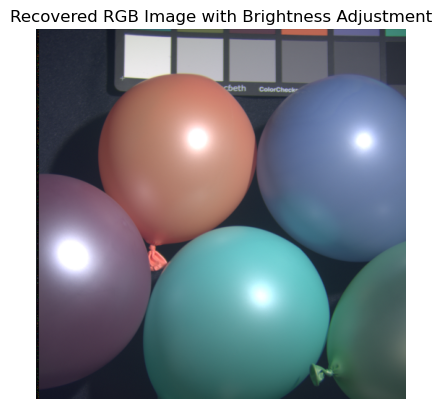

In [5]:
import numpy as np
import imageio.v2 as imageio
import matplotlib.pyplot as plt

def recover_rgb_with_brightness_adjustment(image_folder, gamma=2.2, scale_factor=1.5):
    """
    Recover and brighten the RGB image from CAVE dataset multispectral images.

    Args:
        image_folder (str): Path to the folder containing multispectral images.
        gamma (float): Gamma correction factor (default: 2.2).
        scale_factor (float): Linear scaling factor for brightness adjustment.
    """
    # Define the spectral bands corresponding to R, G, B
    band_indices = {'R': 19, 'G': 9, 'B': 3}  # 0-based indexing

    # Initialize an empty dictionary to hold the band images
    bands = {}

    # Load the specific band images for R, G, B
    for color, band_index in band_indices.items():
        band_path = f"{image_folder}/balloons_ms_{band_index + 1:02d}.png"
        band_image = imageio.imread(band_path).astype(np.float32)
        band_image = band_image / 65535.0  # Normalize 16-bit image to range [0, 1]
        bands[color] = band_image

    # Stack the R, G, B bands into a single RGB image
    rgb_image = np.dstack((bands['R'], bands['G'], bands['B']))

    # Apply brightness adjustment
    rgb_image = np.clip(rgb_image * scale_factor, 0, 1)  # Linear scaling
    rgb_image = rgb_image ** (1 / gamma)  # Gamma correction

    # Display the recovered and adjusted RGB image
    plt.imshow(rgb_image)
    plt.title("Recovered RGB Image with Brightness Adjustment")
    plt.axis('off')
    plt.show()

    return rgb_image

# Usage example:
image_folder = "CAVE/balloons_ms/balloons_ms"  # Replace with the path to your folder
rgb_image = recover_rgb_with_brightness_adjustment(image_folder)


In [10]:
import os
import math
import numpy as np
from PIL import Image
from iqa import QualityMetrics
import torch

def quality_RGGB_and_RGYB(root_dir, scene="beads_ms", interpolation_type="interpolation"):
    rggb_base = os.path.join(root_dir, scene, "RGGB")
    rgyb_base = os.path.join(root_dir, scene, "RGYB", interpolation_type)

    quality_evaluator = QualityMetrics()
    # Check if the directories exist
    if not os.path.isdir(rggb_base):
        raise FileNotFoundError(f"RGGB base directory not found at {rggb_base}")
    if not os.path.isdir(rgyb_base):
        raise FileNotFoundError(f"RGYB base directory not found at {rgyb_base}")

    # We expect subdirectories for each algorithm (e.g., bilinear, m    alvar2004, menon2007) inside each
    algorithms = [d for d in os.listdir(rggb_base) if os.path.isdir(os.path.join(rggb_base, d))]

    for alg in algorithms:
        rggb_rgb_path = os.path.join(rggb_base, alg, "demosaiced_RGB.png")
        rgyb_rgb_path = os.path.join(rgyb_base, alg, "demosaiced_RGB.png")
        
        if not (os.path.isfile(rggb_rgb_path) and os.path.isfile(rgyb_rgb_path)):
            # If for some reason one doesn't exist, skip or print a warning
            print(f"Skipping {alg}: Missing RGB demosaiced image.")
            continue
        
        rggb_rgb_path = Image.open(rggb_rgb_path)
        rgyb_rgb_path = Image.open(rgyb_rgb_path)
        rggb_rgb_path = np.array(rggb_rgb_path)
        rgyb_rgb_path = np.array(rgyb_rgb_path)

        rggb_rgb_path = rggb_rgb_path[..., :3]  # Remove alpha channel if present
        rgyb_rgb_path = rgyb_rgb_path[..., :3]
        
        
        rggb_rgb_path = torch.tensor(rggb_rgb_path).permute(2, 0, 1).float().unsqueeze(0)
        rgyb_rgb_path = torch.tensor(rgyb_rgb_path).permute(2, 0, 1).float().unsqueeze(0)
        

        # exit()
        
        quality_evaluator.apply(rggb_rgb_path, rgyb_rgb_path)
        quality_evaluator.save_data(f"{scene}_{alg}_{interpolation_type}_metrics.csv")




In [14]:

# Example usage:
root_directory = "output"
scene_name = "oil_painting_ms" # ""
interpolation_type = "interpolation_based_gradient" # "interpolation" # "interpolation_based_gradient" #""
quality_RGGB_and_RGYB(root_directory, scene_name, interpolation_type)

/home/asekhri/.conda/envs/myenv/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/asekhri/.conda/envs/myenv/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Quality metrics data saved at: oil_painting_ms_malvar2004_interpolation_based_gradient_metrics.csv
Quality metrics data saved at: oil_painting_ms_bilinear_interpolation_based_gradient_metrics.csv
Quality metrics data saved at: oil_painting_ms_menon2007_interpolation_based_gradient_metrics.csv


In [39]:
def compute_psnr_on_Y_channel(image1, image2):
    """
    Compute the PSNR between two images on the Y channel of the YCbCr color space.

    Args:
        image1 (np.ndarray): The first image.
        image2 (np.ndarray): The second image.

    Returns:
        float: The PSNR value.
    """
    r1, g1, b1 = image1[..., 0], image1[..., 1], image1[..., 2]
    r2, g2, b2 = image2[..., 0], image2[..., 1], image2[..., 2]
    
    # Convert the images to YCbCr color space
    image1_ycbcr = np.array(Image.fromarray(image1).convert("YCbCr"))
    image2_ycbcr = np.array(Image.fromarray(image2).convert("YCbCr"))

    # Extract the Y channel
    y1 = image1_ycbcr[..., 0].astype(np.float32)
    y2 = image2_ycbcr[..., 0].astype(np.float32)
    
    
    # print(r1.max(), g1.max(), b1.max())
    # print(r2.max(), g2.max(), b2.max())
    # print(r1.min(), g1.min(), b1.min())
    # print(r2.min(), g2.min(), b2.min())
    

    # Compute the mean squared error
    mse = np.mean((y1 - y2) ** 2)

    # Compute the peak signal-to-noise ratio
    psnr = 20 * math.log10(255) - 10 * math.log10(mse)
    
    # Compute MSE for each channel
    r_mse = np.mean((r1 - r2) ** 2)
    # print("R MSE:", r_mse)
    g_mse = np.mean((g1 - g2) ** 2)
    # print("G MSE:", g_mse)
    b_mse = np.mean((b1 - b2) ** 2)
    # print("B MSE:", b_mse)

    # Check and compute PSNR for each channel
    r_psnr = 20 * math.log10(255) - 10 * math.log10(r_mse) if r_mse > 0 else float('inf')
    g_psnr = 20 * math.log10(255) - 10 * math.log10(g_mse) if g_mse > 0 else float('inf')
    b_psnr = 20 * math.log10(255) - 10 * math.log10(b_mse) if b_mse > 0 else float('inf')

    
    return (psnr, r_psnr, g_psnr, b_psnr)

In [42]:
def quality_RGGB_and_RGYB(root_dir, scene="beads_ms", interpolation_type="interpolation"):
    rggb_base = os.path.join(root_dir, scene, "RGGB")
    rgyb_base = os.path.join(root_dir, scene, "RGYB", interpolation_type)

    quality_evaluator = QualityMetrics()
    # Check if the directories exist
    if not os.path.isdir(rggb_base):
        raise FileNotFoundError(f"RGGB base directory not found at {rggb_base}")
    if not os.path.isdir(rgyb_base):
        raise FileNotFoundError(f"RGYB base directory not found at {rgyb_base}")

    # We expect subdirectories for each algorithm (e.g., bilinear, m    alvar2004, menon2007) inside each
    algorithms = [d for d in os.listdir(rggb_base) if os.path.isdir(os.path.join(rggb_base, d))]

    for alg in algorithms:
        rggb_rgb_path = os.path.join(rggb_base, alg, "demosaiced_RGB.png")
        rgyb_rgb_path = os.path.join(rgyb_base, alg, "demosaiced_RGB.png")
        
        if not (os.path.isfile(rggb_rgb_path) and os.path.isfile(rgyb_rgb_path)):
            # If for some reason one doesn't exist, skip or print a warning
            print(f"Skipping {alg}: Missing RGB demosaiced image.")
            continue
        
        rggb_rgb_path = Image.open(rggb_rgb_path)
        rgyb_rgb_path = Image.open(rgyb_rgb_path)
        rggb_rgb_path = np.array(rggb_rgb_path)
        rgyb_rgb_path = np.array(rgyb_rgb_path)

        rggb_rgb_path = rggb_rgb_path[..., :3]  # Remove alpha channel if present
        rgyb_rgb_path = rgyb_rgb_path[..., :3]
        
        y_psnr, r_psnr, g_psnr, b_psnr = compute_psnr_on_Y_channel(rggb_rgb_path, rgyb_rgb_path)
        
        print(f"{scene}_{alg}_{interpolation_type} Y-PSNR: {y_psnr:.3f}, G-PSNR: {g_psnr:.3f}")

In [43]:
# Example usage:
root_directory = "output"
scene_name = "beads_ms" # "oil_painting_ms" # ""
interpolation_type = "interpolation" # "" # "interpolation_based_gradient" #""
quality_RGGB_and_RGYB(root_directory, scene_name, interpolation_type)

beads_ms_malvar2004_interpolation Y-PSNR: 34.927, G-PSNR: 37.233
beads_ms_bilinear_interpolation Y-PSNR: 37.830, G-PSNR: 37.355
beads_ms_menon2007_interpolation Y-PSNR: 33.970, G-PSNR: 37.026


In [44]:
# Example usage:
root_directory = "output"
scene_name = "oil_painting_ms" # "oil_painting_ms" # ""
interpolation_type = "interpolation" # "" # "interpolation_based_gradient" #""
quality_RGGB_and_RGYB(root_directory, scene_name, interpolation_type)

oil_painting_ms_malvar2004_interpolation Y-PSNR: 33.886, G-PSNR: 34.666
oil_painting_ms_bilinear_interpolation Y-PSNR: 36.311, G-PSNR: 34.642
oil_painting_ms_menon2007_interpolation Y-PSNR: 32.564, G-PSNR: 33.931


In [45]:
root_directory = "output"
scene_name = "beads_ms" # "oil_painting_ms" # ""
interpolation_type = "interpolation_based_gradient" # "" # "interpolation_based_gradient" #""
quality_RGGB_and_RGYB(root_directory, scene_name, interpolation_type)

beads_ms_malvar2004_interpolation_based_gradient Y-PSNR: 37.503, G-PSNR: 38.997
beads_ms_bilinear_interpolation_based_gradient Y-PSNR: 40.253, G-PSNR: 39.068
beads_ms_menon2007_interpolation_based_gradient Y-PSNR: 36.419, G-PSNR: 38.701


In [47]:
root_directory = "output"
scene_name = "oil_painting_ms" # "oil_painting_ms" # ""
interpolation_type = "interpolation_based_gradient" # "" # "interpolation_based_gradient" #""
quality_RGGB_and_RGYB(root_directory, scene_name, interpolation_type)

oil_painting_ms_malvar2004_interpolation_based_gradient Y-PSNR: 35.016, G-PSNR: 35.299
oil_painting_ms_bilinear_interpolation_based_gradient Y-PSNR: 37.633, G-PSNR: 35.416
oil_painting_ms_menon2007_interpolation_based_gradient Y-PSNR: 33.399, G-PSNR: 34.331


In [66]:
import torch
import piq
import pandas as pd



        
class QualityMetrics:
    def __init__(self):
        self.data = {
            "ssim": None,
            "psnr": None,
            "mse": None,
            "ms_ssim": None,
        }
    
    # Structural Similarity Index (SSIM)
    def ssim(self, image1, image2):
        return piq.ssim(image1, image2).item()
    
    # Peak Signal-to-Noise Ratio (PSNR)
    def psnr(self, image1, image2):
        return piq.psnr(image1, image2).item()
    
    # Mean Squared Error (MSE)
    def mse(self, image1, image2):
        return torch.mean((image1 - image2) ** 2).item()
    
    # Multi-Scale Structural Similarity (MS-SSIM)
    def ms_ssim(self, image1, image2):
        return piq.multi_scale_ssim(image1, image2).item()

    # Apply all metrics
    def apply(self, image1, image2):
        if not isinstance(image1, torch.Tensor) or not isinstance(image2, torch.Tensor):
            raise ValueError("Inputs must be PyTorch tensors.")
        
        if image1.shape != image2.shape:
            raise ValueError("Input images must have the same shape.")

        # Normalize images to range [0, 1] if needed
        if image1.max() > 1 or image2.max() > 1:
            image1 = image1 / 255.0
            image2 = image2 / 255.0
        
        self.data["ssim"] = self.ssim(image1, image2)
        self.data["psnr"] = self.psnr(image1, image2)
        self.data["mse"] = self.mse(image1, image2)
        self.data["ms_ssim"] = self.ms_ssim(image1, image2)
        
        return self.data
    
    def save_data(self, filename):
        df = pd.DataFrame(self.data, index=[0])
        df.to_csv(filename, index=False)
        print(f"Quality metrics data saved at: {filename}")


In [67]:
def quality_RGGB_and_RGYB(root_dir, scene="beads_ms", interpolation_type="interpolation"):
    rggb_base = os.path.join(root_dir, scene, "RGGB")
    rgyb_base = os.path.join(root_dir, scene, "RGYB", interpolation_type)

    quality_evaluator = QualityMetrics()
    # Check if the directories exist
    if not os.path.isdir(rggb_base):
        raise FileNotFoundError(f"RGGB base directory not found at {rggb_base}")
    if not os.path.isdir(rgyb_base):
        raise FileNotFoundError(f"RGYB base directory not found at {rgyb_base}")

    # We expect subdirectories for each algorithm (e.g., bilinear, m    alvar2004, menon2007) inside each
    algorithms = [d for d in os.listdir(rggb_base) if os.path.isdir(os.path.join(rggb_base, d))]

    for alg in algorithms:
        y_channel_path = os.path.join(f"CAVE/{scene}/{scene}", f"{scene}_15.png")
        y_demosaiced_path = os.path.join(rgyb_base, alg, "demosaiced_Y.png")
        
        # if not (os.path.isfile(y_channel_path) and os.path.isfile(y_demosaiced_path)):
        #     # If for some reason one doesn't exist, skip or print a warning
        #     print(f"Skipping {alg}: Missing RGB demosaiced image.")
        #     continue
        
        y_channel_path = Image.open(y_channel_path)
        y_demosaiced_path = Image.open(y_demosaiced_path)
        y_channel_path = np.array(y_channel_path)
        y_demosaiced_path = np.array(y_demosaiced_path)
        y_demosaiced_path = y_demosaiced_path[..., 0]
        
        # scale the y_channel_path from 16 bit to [0, 1]
        y_channel_path = y_channel_path / 65535.0
        # scale the y_demosaiced_path [0, 1] to [0, 255]
        y_channel_path = y_channel_path * 255.0
        y_channel_path = y_channel_path.astype(np.uint8)
        
        y_channel_path = torch.tensor(y_channel_path).float().unsqueeze(0).unsqueeze(0)
        y_demosaiced_path = torch.tensor(y_demosaiced_path).float().unsqueeze(0).unsqueeze(0)
        
        print(y_channel_path.shape, y_demosaiced_path.shape)
        print(y_channel_path.max(), y_demosaiced_path.min())
        print(y_demosaiced_path.max(), y_demosaiced_path.min())
        assert y_channel_path.shape == y_demosaiced_path.shape, "Shape mismatch between images"
        
        
                
        quality_evaluator.apply(y_channel_path, y_demosaiced_path)
        quality_evaluator.save_data(f"Y_{scene}_{alg}_{interpolation_type}_metrics.csv")


In [68]:
# Example usage:
root_directory = "output"
scene_name = "oil_painting_ms" # ""
interpolation_type = "interpolation_based_gradient" # "interpolation" # "interpolation_based_gradient" #""
quality_RGGB_and_RGYB(root_directory, scene_name, interpolation_type)

torch.Size([1, 1, 512, 512]) torch.Size([1, 1, 512, 512])
tensor(190.) tensor(0.)
tensor(255.) tensor(0.)
Quality metrics data saved at: Y_oil_painting_ms_malvar2004_interpolation_based_gradient_metrics.csv
torch.Size([1, 1, 512, 512]) torch.Size([1, 1, 512, 512])
tensor(190.) tensor(0.)
tensor(255.) tensor(0.)
Quality metrics data saved at: Y_oil_painting_ms_bilinear_interpolation_based_gradient_metrics.csv
torch.Size([1, 1, 512, 512]) torch.Size([1, 1, 512, 512])
tensor(190.) tensor(0.)
tensor(255.) tensor(0.)
Quality metrics data saved at: Y_oil_painting_ms_menon2007_interpolation_based_gradient_metrics.csv


In [69]:
# Example usage:
root_directory = "output"
scene_name = "oil_painting_ms" # ""
interpolation_type = "interpolation" # "interpolation" # "interpolation_based_gradient" #""
quality_RGGB_and_RGYB(root_directory, scene_name, interpolation_type)

torch.Size([1, 1, 512, 512]) torch.Size([1, 1, 512, 512])
tensor(190.) tensor(0.)
tensor(255.) tensor(0.)
Quality metrics data saved at: Y_oil_painting_ms_malvar2004_interpolation_metrics.csv
torch.Size([1, 1, 512, 512]) torch.Size([1, 1, 512, 512])
tensor(190.) tensor(0.)
tensor(255.) tensor(0.)
Quality metrics data saved at: Y_oil_painting_ms_bilinear_interpolation_metrics.csv
torch.Size([1, 1, 512, 512]) torch.Size([1, 1, 512, 512])
tensor(190.) tensor(0.)
tensor(255.) tensor(0.)
Quality metrics data saved at: Y_oil_painting_ms_menon2007_interpolation_metrics.csv


In [70]:
# Example usage:
root_directory = "output"
scene_name = "beads_ms" # ""
interpolation_type = "interpolation" # "interpolation" # "interpolation_based_gradient" #""
quality_RGGB_and_RGYB(root_directory, scene_name, interpolation_type)

torch.Size([1, 1, 512, 512]) torch.Size([1, 1, 512, 512])
tensor(241.) tensor(0.)
tensor(255.) tensor(0.)
Quality metrics data saved at: Y_beads_ms_malvar2004_interpolation_metrics.csv
torch.Size([1, 1, 512, 512]) torch.Size([1, 1, 512, 512])
tensor(241.) tensor(0.)
tensor(255.) tensor(0.)
Quality metrics data saved at: Y_beads_ms_bilinear_interpolation_metrics.csv
torch.Size([1, 1, 512, 512]) torch.Size([1, 1, 512, 512])
tensor(241.) tensor(0.)
tensor(255.) tensor(0.)
Quality metrics data saved at: Y_beads_ms_menon2007_interpolation_metrics.csv


In [71]:
# Example usage:
root_directory = "output"
scene_name = "beads_ms" # ""
interpolation_type = "interpolation_based_gradient" # "interpolation" # "interpolation_based_gradient" #""
quality_RGGB_and_RGYB(root_directory, scene_name, interpolation_type)

torch.Size([1, 1, 512, 512]) torch.Size([1, 1, 512, 512])
tensor(241.) tensor(0.)
tensor(255.) tensor(0.)
Quality metrics data saved at: Y_beads_ms_malvar2004_interpolation_based_gradient_metrics.csv
torch.Size([1, 1, 512, 512]) torch.Size([1, 1, 512, 512])
tensor(241.) tensor(0.)
tensor(255.) tensor(0.)
Quality metrics data saved at: Y_beads_ms_bilinear_interpolation_based_gradient_metrics.csv
torch.Size([1, 1, 512, 512]) torch.Size([1, 1, 512, 512])
tensor(241.) tensor(0.)
tensor(255.) tensor(0.)
Quality metrics data saved at: Y_beads_ms_menon2007_interpolation_based_gradient_metrics.csv
